# Assignment 2.1

In this assignment, you will work on a Classical Optimization problems. Your tasks are as follows:

1. **Model the Problem**: Formulate the given problem as an integer programming model. Define the decision variables, objective function, and constraints clearly.

2. **Implement in PULP**: Use the PULP library in Python to implement your integer programming model. Ensure that your code is well-documented and follows best practices.

3. **Validate the Solution**: Solve the model using PULP and validate the solution. Check if the solution meets all the constraints and discuss the results.

Make sure to include your code and explanations in the notebook.

## Student Data

- **Student Name**: René Guzmán Pérez
- **Student ID**: 1849342

## Problem Statement

In this assignment, you will study an orienteering problem. The (X, Y) coordinates and score of each node are given in the file `assets/op.csv`. The node 0 is the initial depot.

Your task is to study this problem and to provide a solution.


## 1. Preparación de datos (P1)
**Datos y conjuntos.**

* Conjunto de nodos: $V=\{0,1,\ldots,n-1\}$. El nodo $0$ es el depósito (origen/destino).
* Para cada $i\in V$: coordenadas $(x_i,y_i)$ y beneficio/puntaje $s_i\ge 0$ (con $s_0=0$).
* Tiempos/distancias:
    * $t_{ij}=\|(x_i,y_i)-(x_j,y_j)\|_2$ para $i\neq j$, y $t_{ii}=0$.
    * En la práctica construimos la matriz $D=[t_{ij}]$ y el diccionario `t[(i,j)]`.
* Supuestos: Métrica simétrica $t_{ij}=t_{ji}$ y desigualdad triangular.

**Qué se hace en P1.**

* Cargar `op.csv` y estandarizar columnas (id, x, y, score).
* Construir $D$ y $t_{ij}$.
* Graficar nodos para inspección.

---

## 2. Problema del Viajante (P2) — Cálculo de $H$
**Objetivo.** Obtener el tiempo mínimo para visitar **todos** los nodos y regresar al depósito. Denotamos ese óptimo por $H$.



**Variables.**

* $x_{ij}\in\{0,1\}$ para $i\neq j$: 1 si se usa el arco $i\to j$.
* $u_i\in\mathbb{R}$ (MTZ) para $i\in V\setminus\{0\}$, con $1\le u_i\le n-1$.

**Modelo (TSP–MTZ).**
$$
\begin{aligned}
\min_{x,u}\quad 
& \sum_{i\in V}\sum_{\substack{j\in V\\ j\neq i}} t_{ij}\,x_{ij} \\
\text{s.a.}\quad
& \sum_{\substack{j\in V\\ j\neq i}} x_{ij} = 1, && \forall i\in V \quad\text{}\\
& \sum_{\substack{j\in V\\ j\neq i}} x_{ji} = 1, && \forall i\in V \quad\text{}\\
& x_{ii}=0, && \forall i\in V\\
& u_i - u_j + (n-1)\,x_{ij} \le n-2, && \forall i\neq j,\; i,j\in V\setminus\{0\} \quad\text{(MTZ)}\\
& 1\le u_i \le n-1, && \forall i\in V\setminus\{0\}\\
& x_{ij}\in\{0,1\}, && \forall i\neq j.
\end{aligned}
$$

**Implementación/validación.** Se resuelve con PuLP–CBC (con o sin límite de tiempo). Si el estado no es `Optimal`, usamos la mejor solución factible como cota superior y definimos $H$ con su costo. Validamos grados (1 in / 1 out por nodo) y ruta $0\to \ldots \to 0$.

---

## 3. Orienteering (P3) — Presupuesto $h=\alpha H$
**Idea.** Con un presupuesto $h=\alpha H$ ($\alpha\in(0,1]$), seleccionar qué nodos visitar y en qué orden (saliendo y regresando a 0) para **maximizar el beneficio total**.



**Variables.**

* $x_{ij}\in\{0,1\}$ para $i\neq j$.
* $y_i\in\{0,1\}$ (visita de $i$); $y_0=1$.
* $u_i$ (MTZ) para $i\in V\setminus\{0\}$.

**Modelo (OP–MTZ).**
$$
\begin{aligned}
\max_{x,y,u}\quad 
& \sum_{i\in V\setminus\{0\}} s_i\, y_i \\
\text{s.a.}\quad
& \sum_{i\in V}\sum_{\substack{j\in V\\ j\neq i}} t_{ij}\,x_{ij} \;\le\; h=\alpha H && \text{}\\
& \sum_{\substack{j\in V\\ j\neq 0}} x_{0j} = 1, && \sum_{\substack{i\in V\\ i\neq 0}} x_{i0} = 1 \quad\text{}\\
& \sum_{\substack{j\in V\\ j\neq i}} x_{ij} = y_i, && \sum_{\substack{j\in V\\ j\neq i}} x_{ji} = y_i,\quad \forall i\in V\setminus\{0\}\\
& x_{ii}=0,\ \forall i\in V; && u_i - u_j + (n-1)x_{ij} \le n-2,\ \forall i\neq j\in V\setminus\{0\}\\
& 1\le u_i \le n-1,\ \forall i\in V\setminus\{0\}; && y_0=1,\ y_i\in\{0,1\},\ x_{ij}\in\{0,1\}.
\end{aligned}
$$

**Implementación/validación.** Se usa `orienteering_p3(α,H,df,t,...)` (PuLP–CBC, con límite de tiempo). Se reportan: ruta, nodos visitados, score $\sum s_i y_i$, `time_used` $\sum t_{ij}x_{ij}$ y estado. Se valida `time_used` $\le h$, grados coherentes y ausencia de subciclos.

---

## 4. Estudio del impacto de $\alpha$ (P4)
**Propósito.** Analizar cómo cambia la solución del OP al variar $h=\alpha H$.

**Procedimiento.**

1.  Fijar $\alpha\in\{0.50, 0.60, 0.70, 0.80, 0.90\}$.
2.  Resolver P3 para cada $\alpha$ (con límite de tiempo moderado) y registrar: $h$, score, `time_used`, nodos visitados, status, ruta.
3.  Presentar tabla y gráficas: puntaje vs. $\alpha$ y nodos visitados vs. $\alpha$.

**Conclusión esperada.** Al crecer $\alpha$, aumenta el horizonte $h$ y el modelo puede visitar más nodos y/o nodos con mayor $s_i$, produciendo incrementos discretos en el puntaje y en el número de nodos visitados.

**Nota de reporte.** Si P2/P3 se corrieron con límite de tiempo y el estado no es `Optimal`, declarar que la solución es factible (no necesariamente óptima) y que $H$ puede ser una cota superior. Verificar siempre `time_used` $\le h$ y la coherencia de grados/flujo.

In [1]:
# Base
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pulp import (
    LpProblem, LpMinimize, LpMaximize, LpVariable, LpBinary, lpSum,
    LpStatus, PULP_CBC_CMD
)
from pathlib import Path

plt.rcParams["figure.figsize"] = (5,5)


## Question 1

Read the CSV File and store it in a pandas dataframe

In [2]:
# configurar datos 
def load_op_df():
    candidatos = [
        "assets/op.csv",
        "assets/op_from_excel.csv",
        "op.csv",
        "op_from_excel.csv",
        "/mnt/data/op_from_excel.csv"
    ]
    ruta = next((p for p in candidatos if Path(p).exists()), None)
    if ruta is None:
        raise FileNotFoundError("No pusiste el csv René jajajaja")

    try:
        df_ = pd.read_csv(ruta)
    except Exception:
        try:
            df_ = pd.read_excel(ruta)
        except Exception as e:
            raise e

    df_ = df_.rename(columns={"node_id":"id", "x_coord":"x", "y_coord":"y"})
    cols_ok = {"id","x","y","score"}
    if not cols_ok.issubset(df_.columns):
        raise ValueError(f"Faltan columnas. Tengo: {df_.columns.tolist()} — espero: {sorted(cols_ok)}")
    df_["id"] = df_["id"].astype(int)
    df_ = df_[["id","x","y","score"]].sort_values("id").reset_index(drop=True)
    return df_

df = load_op_df()
print("Listongo, a trabajar", df.shape)
display(df.head())




Listongo, a trabajar (21, 4)


,id,x,y,score
0,0,0.000000,0.000000,0
1,1,34.052235,-118.243683,10
2,2,36.169941,-115.139832,20
3,3,40.712776,-74.005974,15
4,4,34.052235,-118.243683,25


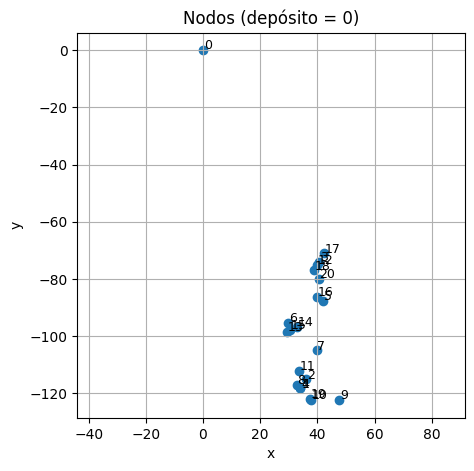

In [3]:
# Visualización rápida de nodos
plt.figure()
plt.scatter(df["x"], df["y"])
for _, r in df.iterrows():
    plt.text(r["x"]+0.3, r["y"]+0.3, str(int(r["id"])), fontsize=9)
plt.title("Nodos (depósito = 0)"); plt.xlabel("x"); plt.ylabel("y"); plt.axis("equal"); plt.grid(True)
plt.show()


In [4]:
# === D y t ===
X = df[["x","y"]].to_numpy(dtype=float)
D = np.sqrt(((X[:,None,:] - X[None,:,:])**2).sum(axis=2))
D = np.round(D, 4)

ids = df["id"].astype(int).tolist()
pos = {i:k for k,i in enumerate(ids)}
t  = {(i,j): float(D[pos[i], pos[j]]) for i in ids for j in ids if i != j}

print("Shape de D:", D.shape)
print("Ejemplo t[(0,1)] =", t.get((0,1)))


Shape de D: (21, 21)
Ejemplo t[(0,1)] = 123.0493


## Question 2

Model the problem as a TSP and determine the minimum time required to visit **all** the node. We will denote it as $H$ in the sequel.

<span style="color:green"> Your Model Here

In [5]:
# Ajuste por tiempo
def tsp_min_time(df, t, depot=0, solver_msg=False, time_limit=180, threads=0):
    ids = df["id"].astype(int).tolist()
    N = [i for i in ids if i != depot]
    n = len(ids)

    m = LpProblem("TSP_MinTime", LpMinimize)

    x = LpVariable.dicts("x", (ids, ids), 0, 1, LpBinary)
    u = LpVariable.dicts("u", N, lowBound=0, upBound=n-1)

    for i in ids:
        m += x[i][i] == 0

    m += lpSum(t[i, j] * x[i][j] for i in ids for j in ids if i != j)

    for i in ids:
        m += lpSum(x[i][j] for j in ids if j != i) == 1
        m += lpSum(x[j][i] for j in ids if j != i) == 1

    for i in N:
        for j in N:
            if i != j:
                m += u[i] - u[j] + (n-1)*x[i][j] <= (n-2)

    solver = PULP_CBC_CMD(msg=solver_msg, timeLimit=time_limit, threads=threads or None)
    status = m.solve(solver)
    status_str = LpStatus[status]

    succ = {i: None for i in ids}
    for i in ids:
        for j in ids:
            if i != j and x[i][j].value() is not None and x[i][j].value() > 0.5:
                succ[i] = j

    route, cur, seen = [], depot, set()
    while cur is not None and cur not in seen:
        route.append(cur); seen.add(cur)
        cur = succ[cur]
        if cur == depot:
            route.append(depot); break

    H = sum(t[i, j] for i in ids for j in ids if i != j and x[i][j].value() is not None and x[i][j].value() > 0.5)
    return {"status": status_str, "H": float(H), "route": route}

res_tsp = tsp_min_time(df=df, t=t, depot=0, solver_msg=False, time_limit=180, threads=0)
print("TSP:", res_tsp["status"])
print("H =", res_tsp["H"])
H = res_tsp["H"]

if res_tsp["status"] != "Optimal":
    print("Nota: H es factible (cota superior); no se probó optimalidad con el límite de tiempo.")


TSP: Optimal
H = 288.7983


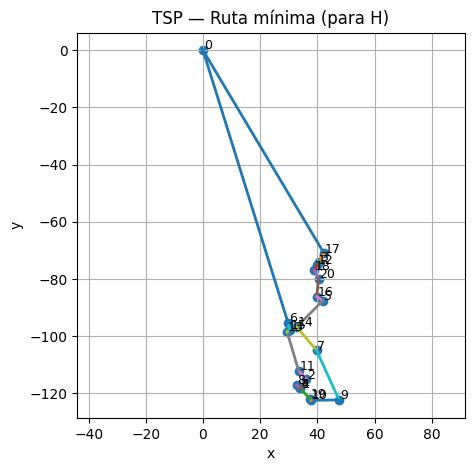

In [6]:
# Plot TSP
def plot_route(df, route, title="Route"):
    xy = df.set_index("id")[["x","y"]]
    plt.figure()
    plt.scatter(xy["x"], xy["y"])
    for i, (x, y) in xy.iterrows():
        plt.text(x+0.3, y+0.3, str(int(i)), fontsize=9)
    for a, b in zip(route[:-1], route[1:]):
        x1, y1 = xy.loc[a, "x"], xy.loc[a, "y"]
        x2, y2 = xy.loc[b, "x"], xy.loc[b, "y"]
        plt.plot([x1, x2], [y1, y2], linewidth=2)
    plt.title(title); plt.xlabel("x"); plt.ylabel("y"); plt.axis("equal"); plt.grid(True); plt.show()

plot_route(df, res_tsp["route"], title="TSP — Ruta mínima (para H)")


## Question 3

Model the Orienteering Problem and consider a planning horizon $h=\alpha H$, with $\alpha\in]0,1[$.

Solve it with $\alpha=0.8$

<span style="color:green"> Your Model Here

In [13]:
# ORIENTEERING con CBC
import numpy as np
from pulp import (
    LpProblem, LpMaximize, LpVariable, LpBinary, lpSum,
    LpStatus, PULP_CBC_CMD
)

def orienteering_p3(
    df,
    H: float,
    t=None,
    *,
    alpha: float = 0.8,
    depot: int = 0,
    return_to_depot: bool = True,
    time_limit: int = 20,
    threads: int | None = None,
    gap: float | None = 0.03,       # gap relativo; pon None si no quieres gap
    k_neighbors: int | None = 8,    # poda: K vecinos por nodo; None = sin poda
    solver_msg: bool = False,
):
    """
    Devuelve: dict con {status, score, time_used, route, visited, arcs}
    """
    # ---------- datos ----------
    ids = df["id"].astype(int).tolist()
    assert depot in ids, "El depósito no está en df['id']."
    N = [i for i in ids if i != depot]
    n = len(ids)
    h = float(alpha * H)
    score = dict(zip(df["id"].astype(int), df["score"].astype(float)))

    # construir t si no lo pasas
    if t is None:
        X = df[["x", "y"]].to_numpy(dtype=float)
        D = np.sqrt(((X[:, None, :] - X[None, :, :]) ** 2).sum(axis=2))
        pos = {i: k for k, i in enumerate(ids)}
        t = {(i, j): float(D[pos[i], pos[j]]) for i in ids for j in ids if i != j}

    # ---------- modelo ----------
    mdl = LpProblem("Orienteering", LpMaximize)
    x = LpVariable.dicts("x", (ids, ids), 0, 1, LpBinary)
    y = LpVariable.dicts("y", ids, 0, 1, LpBinary)

    # sin lazos
    for i in ids:
        x[i][i].upBound = 0

    # ---------- PODAS ----------
    # 1) nodos imposibles (ir y volver excede h)
    for i in N:
        if t[depot, i] + t[i, depot] > h:
            y[i].upBound = 0
            for j in ids:
                x[i][j].upBound = 0
                x[j][i].upBound = 0

    # 2) k-vecinos por nodo (mantener arcos cortos)
    if k_neighbors is not None:
        K = max(1, min(k_neighbors, n - 1))
        for i in ids:
            neigh = sorted([j for j in ids if j != i], key=lambda j: t[i, j])
            keep = set(neigh[:K])
            keep.add(depot)  # mantener conexión con depósito
            for j in ids:
                if i == j:
                    continue
                if (j not in keep) or (t[i, j] > h):  # además descarta arcos demasiado largos
                    x[i][j].upBound = 0

    # ---------- objetivo ----------
    mdl += lpSum(score[i] * y[i] for i in N)

    # ---------- restricciones ----------
    # Presupuesto
    mdl += lpSum(t[i, j] * x[i][j] for i in ids for j in ids if i != j) <= h, "time_budget"

    # Depósito
    if return_to_depot:
        mdl += lpSum(x[depot][j] for j in ids if j != depot) == 1, "out_depot"
        mdl += lpSum(x[i][depot] for i in ids if i != depot) == 1, "in_depot"
        mdl += y[depot] == 1, "visit_depot"
    else:
        mdl += lpSum(x[depot][j] for j in ids if j != depot) <= 1, "out_depot_le1"
        mdl += lpSum(x[i][depot] for i in ids if i != depot) == 0, "in_depot_eq0"
        mdl += y[depot] == 1, "visit_depot"

    # Flujo en nodos visitados + enlaces fuertes
    for i in N:
        mdl += lpSum(x[i][j] for j in ids if j != i) == y[i], f"out_{i}"
        mdl += lpSum(x[j][i] for j in ids if j != i) == y[i], f"in_{i}"
    for i in ids:
        for j in ids:
            if i != j:
                mdl += x[i][j] <= y[i], f"link_out_{i}_{j}"
                mdl += x[i][j] <= y[j], f"link_in_{i}_{j}"

    # MTZ
    u = LpVariable.dicts("u", N, lowBound=0, upBound=n - 1)
    for i in N:
        for j in N:
            if i != j:
                mdl += u[i] - u[j] + (n - 1) * x[i][j] <= (n - 2), f"mtz_{i}_{j}"

    # ---------- solve (CBC directo, sin helper) ----------
    try:
        solver = PULP_CBC_CMD(msg=solver_msg, timeLimit=time_limit,
                              threads=threads or None, fracGap=gap)
    except TypeError:
        # fallback si tu build no acepta fracGap
        try:
            solver = PULP_CBC_CMD(msg=solver_msg, timeLimit=time_limit,
                                  threads=threads or None, gapRel=gap)
        except TypeError:
            solver = PULP_CBC_CMD(msg=solver_msg, timeLimit=time_limit,
                                  threads=threads or None)

    status = mdl.solve(solver)
    status_str = LpStatus[status]
    if solver_msg:
        print(f"[CBC] status={status_str} | h={h:.3f} | K={k_neighbors} | gap={gap} | tl={time_limit}s")

    # ---------- extraer solución ----------
    arcs = {(i, j): 1
            for i in ids for j in ids
            if i != j and (x[i][j].value() or 0) > 0.5}
    visited = [i for i in ids if (y[i].value() or 0) > 0.5]

    # reconstrucción de ruta
    succ = {i: None for i in ids}
    for (i, j) in arcs:
        succ[i] = j
    route, cur, seen = [], depot, set()
    while cur is not None and cur not in seen:
        route.append(cur); seen.add(cur)
        cur = succ.get(cur)
        if return_to_depot and cur == depot and cur is not None:
            route.append(depot); break
        if len(route) > n + 1:
            break

    time_used = float(sum(t[i, j] for (i, j) in arcs.keys()))
    total_score = float(sum(score[i] for i in visited if i != depot))

    return {
        "status": status_str,
        "score": total_score,
        "time_used": time_used,
        "route": route,
        "visited": sorted(visited),
        "arcs": arcs
    }

def print_p3(res):
    print("=== P3 (Orienteering) ===")
    print("status   :", res["status"])
    print("score    :", f"{res['score']:.3f}")
    print("time_used:", f"{res['time_used']:.3f}")
    print("visited  :", res["visited"])
    print("route    :", " -> ".join(map(str, res["route"])) if res["route"] else "(vacía)")

[CBC] status=Optimal | h=231.039 | K=8 | gap=0.03 | tl=20s
=== P3 (Orienteering) ===
status   : Optimal
score    : 745.000
time_used: 229.712
visited  : [0, 3, 5, 6, 12, 13, 14, 15, 16, 17, 18, 20]
route    : 0 -> 17 -> 12 -> 3 -> 20 -> 18 -> 16 -> 5 -> 14 -> 15 -> 13 -> 6 -> 0


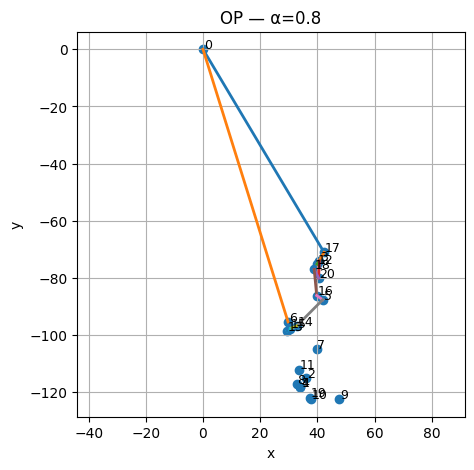

In [ ]:
alpha = 0.8
res_p3 = orienteering_p3(
    df, H=H, t=t,
    alpha=alpha,
    depot=0,
    return_to_depot=True,
    time_limit=20,
    threads=None,
    gap=0.03,
    k_neighbors=8,
    solver_msg=True,
)

print_p3(res_p3)
plot_route(df, res_p3["route"], title=f"OP — α={alpha}")


## Question 4

Using your model, do a study on the impact of the parameter $\alpha$ on the solution.

Support your conclusion with figures, charts, and tables to illustrate the impact of the parameter $\alpha$ on the solution.

<span style="color:green"> Your Study Here

In [20]:
# P4 — Estudio del impacto de α en la solución de Orienteering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def alpha_lower_bound(df, H, t=None, depot=0):
    """Cota inferior de α para que al menos se pueda visitar 1 nodo y regresar."""
    ids = df["id"].astype(int).tolist()
    if t is None:
        # construir tiempos euclidianos si no se pasó
        X = df[["x","y"]].to_numpy(dtype=float)
        D = np.sqrt(((X[:,None,:]-X[None,:,:])**2).sum(axis=2))
        pos = {i:k for k,i in enumerate(ids)}
        t = {(i,j): float(D[pos[i],pos[j]]) for i in ids for j in ids if i!=j}
    best = min(t[depot,i] + t[i,depot] for i in ids if i != depot)
    return best / H

def run_p4(
    df, H, t=None, *,
    alphas=None,
    depot=0,
    return_to_depot=True,
    time_limit=20,
    threads=None,
    gap=0.03,
    k_neighbors=8,
    solver_msg=False
):
    if alphas is None:
        alphas = [0.50, 0.60, 0.70, 0.80, 0.90, 1.00]
    rows = []
    for a in alphas:
        res = orienteering_p3(
            df, H=H, t=t,
            alpha=a, depot=depot, return_to_depot=return_to_depot,
            time_limit=time_limit, threads=threads, gap=gap,
            k_neighbors=k_neighbors, solver_msg=solver_msg
        )
        visited_count = sum(1 for v in res["visited"] if v != depot)
        rows.append({
            "alpha": a,
            "h": a*H,
            "status": res["status"],
            "score": float(res["score"]),
            "time_used": float(res["time_used"]) if visited_count>0 else np.nan,
            "visited_count": visited_count,
            "route": res["route"]
        })
    df_res = pd.DataFrame(rows).sort_values("alpha").reset_index(drop=True)
    return df_res

def plot_p4_curves(df_p4):
    """Tres curvas: score vs α, visitados vs α, y comparación h vs tiempo usado."""
    xs = df_p4["alpha"].values

    # 1) Score vs α
    plt.figure()
    plt.plot(xs, df_p4["score"].values, marker="o")
    plt.title("Score obtenido vs α"); plt.xlabel("α"); plt.ylabel("Score")
    plt.grid(True); plt.show()

    # 2) Nodos visitados vs α
    plt.figure()
    plt.plot(xs, df_p4["visited_count"].values, marker="o")
    plt.title("Nodos visitados vs α"); plt.xlabel("α"); plt.ylabel("# visitados (sin depósito)")
    plt.grid(True); plt.show()

    # 3) h(α) vs tiempo usado
    plt.figure()
    plt.plot(xs, df_p4["h"].values, marker="o", label="h = α·H")
    plt.plot(xs, df_p4["time_used"].values, marker="o", label="tiempo usado")
    plt.title("Comparación: presupuesto vs tiempo usado"); plt.xlabel("α"); plt.ylabel("tiempo")
    plt.legend(); plt.grid(True); plt.show()

Cota inferior aproximada para α: 0.573


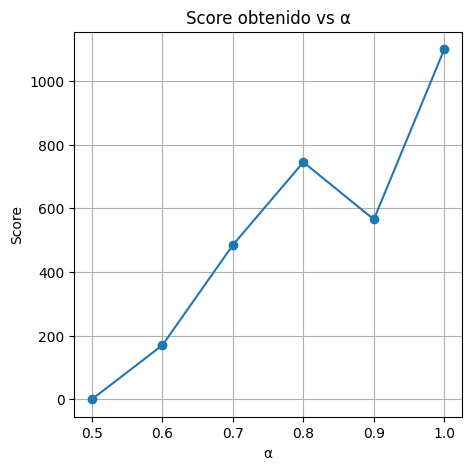

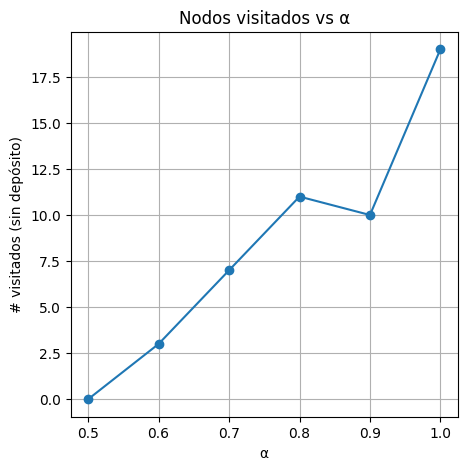

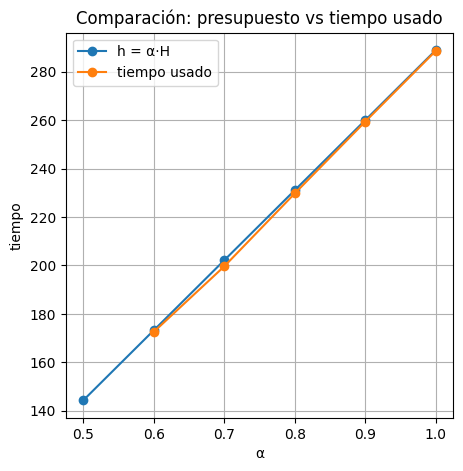

In [21]:
# Cota inferior: si α < α_min no se puede ni ir a 1 nodo y regresar
a_min = alpha_lower_bound(df, H, t=t, depot=0)
print(f"Cota inferior aproximada para α: {a_min:.3f}")

# Corre el barrido (ajusta alphas si quieres)
alphas = [0.50, 0.60, 0.70, 0.80, 0.90, 1.00]
df_p4 = run_p4(
    df, H, t=t, alphas=alphas,
    depot=0, return_to_depot=True,
    time_limit=20, threads=None,
    gap=0.03, k_neighbors=8,
    solver_msg=False
)
df_p4

plot_p4_curves(df_p4)


=== Resumen P4 ===
H (TSP): 288.798
Cota inferior α_min ≈ 0.573
Primer α factible: 0.6

Observaciones:
• Score y #visitados crecen (o se mantienen) al aumentar α (conjunto factible ⊇).
• Si α < α_min, el modelo es infactible (ni siquiera 1 visita con regreso).
• Cuando score se estabiliza, aumentar α no cambia la ruta: h tiene holgura.
• Reproductibilidad: especifica gap, time_limit, k_neighbors, threads usados.
α=0.50: Infeasible (omitida)


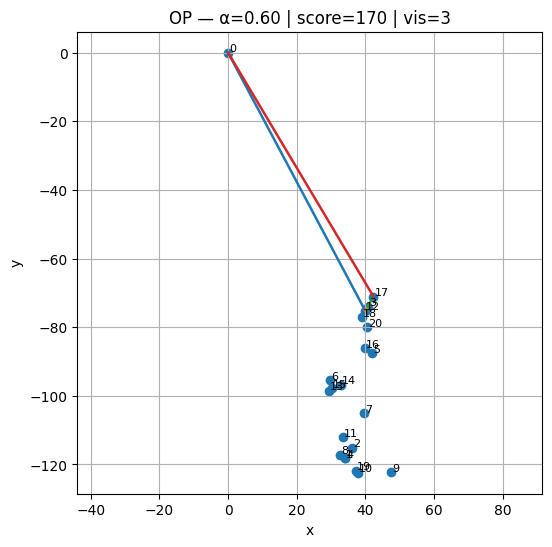

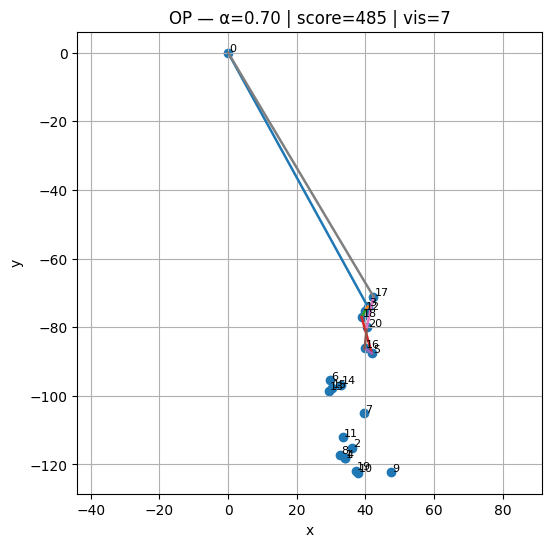

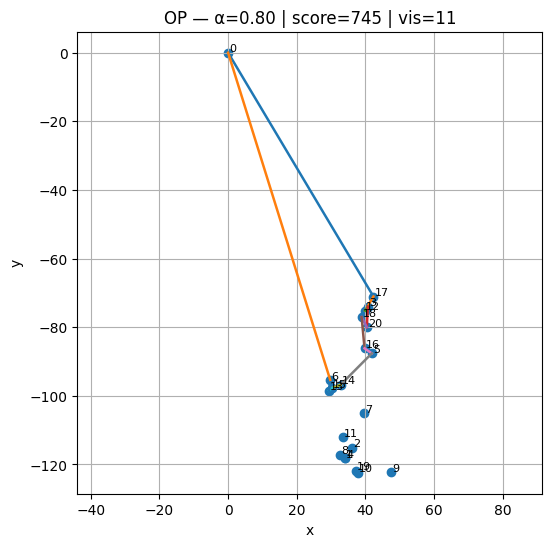

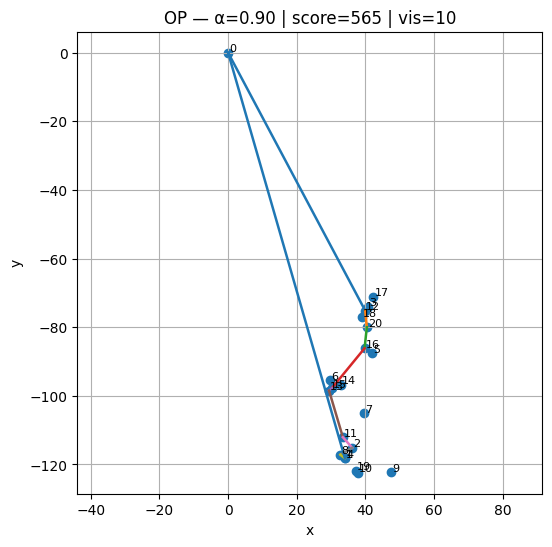

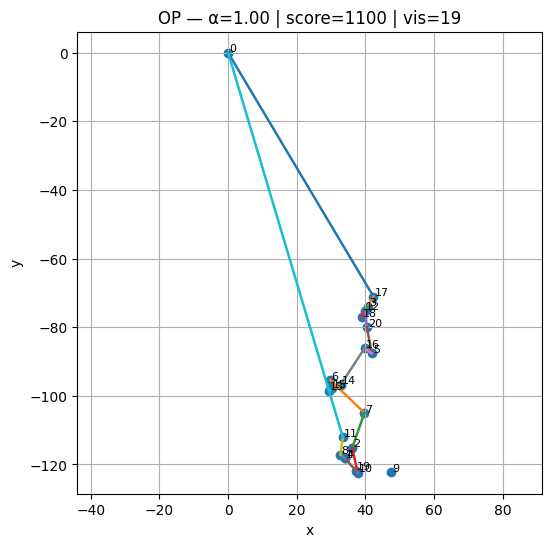

In [33]:
def p4_text_summary(df_p4, H, a_min):
    import numpy as np
    df = df_p4.copy().sort_values("alpha")
    feas = df[df["status"].str.lower().isin(["optimal", "feasible"])]
    first_feas = feas["alpha"].min() if not feas.empty else None

    eps = 1e-6
    sat_alpha = None
    for i in range(len(df)-1):
        if np.all(np.diff(df["score"].iloc[i:]) <= eps):
            sat_alpha = df["alpha"].iloc[i]
            break

    print("=== Resumen P4 ===")
    print(f"H (TSP): {H:.3f}")
    print(f"Cota inferior α_min ≈ {a_min:.3f}")
    print(f"Primer α factible: {first_feas if first_feas is not None else '(no hubo)'}")
    if sat_alpha is not None:
        print(f"Umbral de saturación (score deja de crecer): α ≈ {sat_alpha:.2f}")
    print("\nObservaciones:")
    print("• Score y #visitados crecen (o se mantienen) al aumentar α (conjunto factible ⊇).")
    print("• Si α < α_min, el modelo es infactible (ni siquiera 1 visita con regreso).")
    print("• Cuando score se estabiliza, aumentar α no cambia la ruta: h tiene holgura.")
    print("• Reproductibilidad: especifica gap, time_limit, k_neighbors, threads usados.")

a_min = alpha_lower_bound(df, H, t=t, depot=0)
p4_text_summary(df_p4, H, a_min)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6, 6)

mostrar_infactibles = False

for _, r in df_p4.sort_values("alpha").iterrows():
    status_ok = str(r["status"]).lower() in ("optimal", "feasible")
    if not status_ok and not mostrar_infactibles:
        print(f"α={r['alpha']:.2f}: {r['status']} (omitida)")
        continue

    titulo = f"OP — α={float(r['alpha']):.2f} | score={int(r['score'])} | vis={int(r['visited_count'])}"
    plot_route(df, r["route"], title=titulo)  # cada llamada muestra una figura individual
    

def plot_route(df, route, title="Route"):
    import matplotlib.pyplot as plt
    xy = df.set_index("id")[["x", "y"]]
    plt.figure()
    plt.scatter(xy["x"], xy["y"])
    for i, (x, y) in xy.iterrows():
        plt.text(x+0.3, y+0.3, str(int(i)), fontsize=8)
    for a, b in zip(route[:-1], route[1:]):
        x1, y1 = xy.loc[a, "x"], xy.loc[a, "y"]
        x2, y2 = xy.loc[b, "x"], xy.loc[b, "y"]
        plt.plot([x1, x2], [y1, y2], linewidth=1.8)
    plt.title(title); plt.xlabel("x"); plt.ylabel("y")
    plt.axis("equal"); plt.grid(True); plt.show()
